#  Data Exploration Global $CO_2$
Aquiring reliable data, is the foundation for any analysis project. If your data is incomplete inaccurate, any analysis will draw poor conclusions. 

After aqusition data which has been well formatted into a csv, or similar easy to handle file, should be explored. 

In [1]:
from dur_utils import colours #Durham Utilities module that stores constants like colours, can be found on _githublink_
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Handelling imports, is typically done at the top of the file. Best practice is to avoid having redundant imports in a file. Thus minimising the potential for a bug from incompatibility.

For the first section, the data will be collected from the [NOAA/GML](https://gml.noaa.gov/ccgg/trends/gl_data.html){cite}`NOAA_CO2`. On the website there are multiple different files, [mean monthly csv](https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_gl.csv) was chosen. CSV or comma separated variable files, are a very common way of storing tabular data. [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) and [Numpy](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) both have functions which read CSVs, pandas is much faster. 
```
pd.read_csv(file)
```
```
np.loadtxt(file, delimiter = ',')
```

In [12]:
path_global = './Data/co2_mm_gl.csv' #Path is machine specific. input your own
co2_data_global = pd.read_csv(path_global, header=0, comment='#')
null_sum = (co2_data_global.isna()).values.sum(axis=0)
pd.DataFrame(data=null_sum, index=co2_data_global.columns, columns=['Number of Null Values'])

,Number of Null Values
year,0
month,0
decimal,0
average,0
trend,0


Tabulating number of null entries in each column, provides quick reference to column names and the number of missing entries. In this data, there are no Null fields.
It is notable, that none of the columns have units in their headers apart from years and months, for any of the colums. From, the website we find that the average colum, is a pseudo-unit quantity in parts per million. 

When Displaying the ``` co2_data_global``` dataframe up to the first five rows, it can be seen that the decimal column is given by: 
$$
decimal = year + \frac{month}{12}
$$
This makes it straightforward to plot $CO_2$ average against time.  

In [13]:
co2_data_global.iloc[:5,:]

,year,month,decimal,average,trend
0,1980,1,1980.042,338.55,337.93
1,1980,2,1980.125,339.27,338.22
2,1980,3,1980.208,339.60,338.25
3,1980,4,1980.292,339.99,338.37
4,1980,5,1980.375,340.43,338.91


Plotting the monthly average against time and the trendline, provided by the data set. Shows a consistent increase in the average concentration of $CO_2$ in the atmosphere over the last 40 years, with a cyclical pattern over a shorter timescale. Drawing conclusions from this data is possible, however, because there is also the weekly data from the Mauna Loa, comparing both will yeild more confidence.

Text(0.5, 0, 'Year')

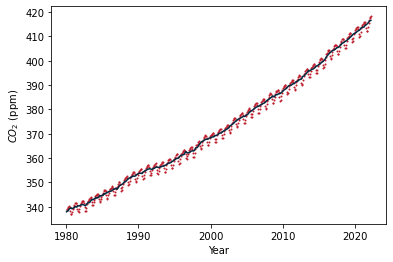

In [29]:
plt.plot(co2_data_global['decimal'], co2_data_global['average'], c=colours.durham.red, linestyle='', marker='o', markersize = 1)
plt.plot(co2_data_global['decimal'], co2_data_global['trend'], c=colours.durham.ink)
plt.ylabel('$CO_2$ (ppm)')
plt.xlabel('Year')

In [17]:
path_ml =  'Data/co2_weekly_mlo.csv'              
co2_data_ml = pd.read_csv(path_ml, header=0, comment='#')
null_sum = (co2_data_ml.isna()).values.sum(axis=0)
pd.DataFrame(data=null_sum, index=co2_data_ml.columns, columns=['Number of Null Values'])

,Number of Null Values
year,0
month,0
day,0
decimal,0
average,0
ndays,0
1 year ago,0
10 years ago,0
increase since 1800,0


Text(0.5, 0, 'Year')

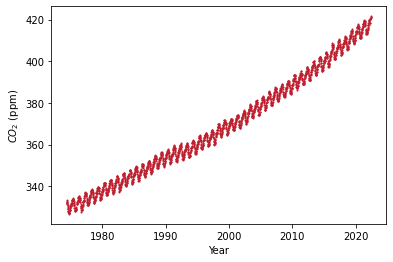

In [33]:
plt.plot(co2_data_ml['decimal'], co2_data_ml['average'], c = colours.durham.red,linestyle='', marker='o', markersize = 1)
plt.ylabel('$CO_2$ (ppm)')
plt.xlabel('Year')

The weekly Mauna Loa data contains more fields than the global average data. However, the decimal format is still avalible. In this dataset, there is clear anomolous data-points. -1000 is a non physical concentration, so cleaning thr rows out which lack data for these weeks, is important before further processing goes ahead. 

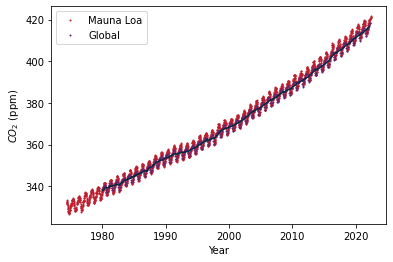

In [37]:
co2_data_ml = co2_data_ml[co2_data_ml['average']>0] # dataframe[mask] the mask provides an array of bools, which makes selecting the values you want efficient and easy
#plotting
plt.plot(co2_data_ml['decimal'], co2_data_ml['average'], c = colours.durham.red,linestyle='', marker='o', markersize = 1, label = 'Mauna Loa')
plt.plot(co2_data_global['decimal'], co2_data_global['average'], c=colours.durham.purple, linestyle='', marker='o', markersize = 1, label = 'Global')
plt.plot(co2_data_global['decimal'], co2_data_global['trend'], c=colours.durham.ink) 
plt.ylabel('$CO_2$ (ppm)')
plt.xlabel('Year')
plt.legend()